In [2]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from fe_gmx import AWH_Ensemble

In [3]:
awh_ensemble = AWH_Ensemble('./AWH', regenerate_awh=True)

Found 101 awh_pmf files.
The latest awh_pmf file is ./AWH/awh_result/awh_t10000.xvg
The latest awh_pmf file was generated at 2023-06-21 13:15:22.700308
Found 4 walkers.
The latest walker was generated at 2023-06-20 15:04:19.984418
Generating pulling data...
Generating log data...
Generating PMF data...


Generating PMF data: 100%|██████████| 101/101 [00:01<00:00, 90.72it/s]


In [4]:
awh_ensemble.awh_log[0]

AWH_LOG(filename=./AWH/rep1/awh.log, index=0), covering_times=[], equlibrated_histogram_time=None, out_of_initial_stage_time=None

t5100
t5600
t6100
t6600
t7100
t7600
t8100
t8600
t9100
t9600


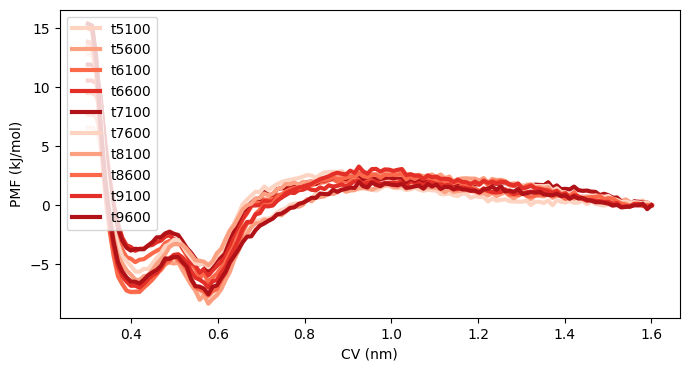

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('Reds', n_colors=5)
fig, ax = plt.subplots(figsize=(8,4))

for time, awh_pmf in zip(awh_ensemble.awh_results.timeseries[-50::5],
                         awh_ensemble.awh_results.pmf[-50::5]):
    print(time)
    awh_r = awh_pmf[:, 0].T
    awh_fes = awh_pmf[:, 1].T
    #+ awh_pmf_r_bias
    awh_fes = awh_fes - awh_fes[-1]
    ax.plot(awh_r, awh_fes, label=time, lw=3)

ax.set_ylabel(f'PMF (kJ/mol)')
ax.set_xlabel('CV (nm)')
ax.legend()
plt.show()

<Axes: xlabel='dim_1', ylabel='dim_2'>

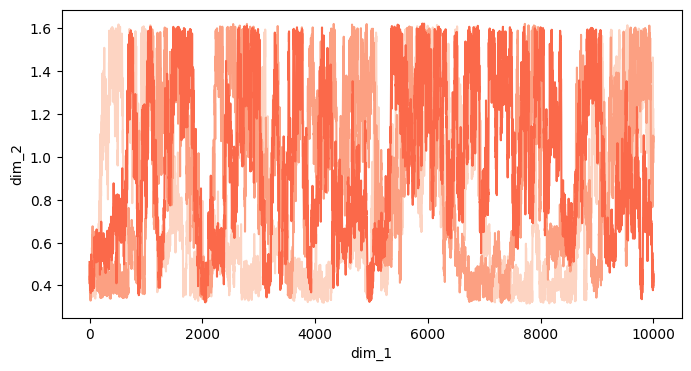

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('Reds', n_colors=5)
fig, ax = plt.subplots(figsize=(8,4))

sns.lineplot(x='dim_1', y='dim_2', data=awh_ensemble.awh_pullx[0].data)
sns.lineplot(x='dim_1', y='dim_2', data=awh_ensemble.awh_pullx[1].data)
sns.lineplot(x='dim_1', y='dim_2', data=awh_ensemble.awh_pullx[2].data)
